<a href="https://colab.research.google.com/github/SoulINdUsT/machine-learning-lab/blob/2nd/weather_predicton_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
try:
    import mlxtend  # noqa
    _HAS_MLXTEND = True
except Exception:
    _HAS_MLXTEND = False
    try:
        import sys, subprocess
        subprocess.check_call([sys.executable, "-m", "pip", "install", "mlxtend"])
        import mlxtend  # noqa
        _HAS_MLXTEND = True
    except Exception:
        pass

In [11]:
# Data manipulation & math
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score,
    RocCurveDisplay, adjusted_rand_score, silhouette_score
)

# Frequent pattern mining (FP-Growth)
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Utility
import re
from IPython.display import display


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd
dataset=  pd.read_csv('/content/drive/MyDrive/DS/Project 1 - Weather Dataset.csv')

In [14]:
dataset

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [6]:
print(f"Rows: {dataset.shape[0]}, Columns: {dataset.shape[1]}")
display(dataset.head())
dataset.info()
display(dataset.describe(include='all').transpose().head(5))
display(dataset.describe())
display(dataset.isnull().sum())
display(dataset.duplicated().sum())
display(dataset.nunique())

Rows: 8784, Columns: 8


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date/Time,8784,8784,12/31/2012 7:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp_C,8784.0,NaN,NaN,NaN,8.798144,11.687883,-23.3,0.1,9.3,18.8,33.0
Dew Point Temp_C,8784.0,NaN,NaN,NaN,2.555294,10.883072,-28.5,-5.9,3.3,11.8,24.4
Rel Hum_%,8784.0,NaN,NaN,NaN,67.431694,16.918881,18.0,56.0,68.0,81.0,100.0
Wind Speed_km/h,8784.0,NaN,NaN,NaN,14.945469,8.688696,0.0,9.0,13.0,20.0,83.0


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


,0
Date/Time,0
Temp_C,0
Dew Point Temp_C,0
Rel Hum_%,0
Wind Speed_km/h,0
Visibility_km,0
Press_kPa,0
Weather,0


np.int64(0)

,0
Date/Time,8784
Temp_C,533
Dew Point Temp_C,489
Rel Hum_%,83
Wind Speed_km/h,34
Visibility_km,24
Press_kPa,518
Weather,50


In [10]:
dataset.describe(include='all').transpose().head(5)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date/Time,8784,8784,12/31/2012 7:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp_C,8784.0,NaN,NaN,NaN,8.798144,11.687883,-23.3,0.1,9.3,18.8,33.0
Dew Point Temp_C,8784.0,NaN,NaN,NaN,2.555294,10.883072,-28.5,-5.9,3.3,11.8,24.4
Rel Hum_%,8784.0,NaN,NaN,NaN,67.431694,16.918881,18.0,56.0,68.0,81.0,100.0
Wind Speed_km/h,8784.0,NaN,NaN,NaN,14.945469,8.688696,0.0,9.0,13.0,20.0,83.0


In [7]:
drop_like = {"unnamed: 0", "index", "id", "serial", "sl"}
dataset = dataset.drop(columns=[c for c in dataset.columns if c.strip().lower() in drop_like], errors="ignore")
dataset = dataset.dropna(axis=0)
print("After dropna:", dataset.shape)

After dropna: (8784, 8)


In [8]:
# 4) Target inference (kept your logic; made numeric coercion safer)
possible_targets = [
    "target","label","class","outcome","rain_tomorrow","raingtomorrow","rain tomorrow",
    "rain_today","raintoday","rain today","precipitation","rainfall","event","weather"
]
target_col = None
for c in dataset.columns:
    if c.strip().lower() in possible_targets:
        target_col = c
        break

if target_col is None:
    # precip-like -> wet vs dry
    precip_cols = [c for c in dataset.columns if re.search(r"precip|rain", c, re.I)]
    if len(precip_cols):
        pcol = precip_cols[0]
        vals = pd.to_numeric(dataset[pcol], errors="coerce").fillna(0)
        dataset["TargetBinary"] = (vals > 0).astype(int)
        target_col = "TargetBinary"

if target_col is None:
    # temperature-like -> hot vs not (above median)
    temp_cols = [c for c in dataset.columns if re.search(r"temp|temperature|max", c, re.I)]
    if len(temp_cols):
        tcol = temp_cols[0]
        vals = pd.to_numeric(dataset[tcol], errors="coerce")
        thr = vals.median()
        dataset["TargetBinary"] = (vals > thr).astype(int)
        target_col = "TargetBinary"

if target_col is None:
    # fallback
    last = dataset.columns[-1]
    if dataset[last].dtype == "O" or dataset[last].nunique() <= 10:
        target_col = last
    else:
        numc = dataset.select_dtypes(include=[np.number]).columns
        if len(numc):
            thr = dataset[numc[0]].median()
            dataset["TargetBinary"] = (dataset[numc[0]] > thr).astype(int)
            target_col = "TargetBinary"
        else:
            dataset["TargetBinary"] = 0
            target_col = "TargetBinary"

print("Using target column:", target_col)

y = dataset[target_col]
X = dataset.drop(columns=[target_col])


Using target column: Weather


In [15]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ],
    remainder="drop"
)
print(f"Numeric cols: {len(num_cols)} | Categorical cols: {len(cat_cols)}")


Numeric cols: 6 | Categorical cols: 1


In [16]:

# 5) Preprocess
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ],
    remainder="drop"
)
print(f"Numeric cols: {len(num_cols)} | Categorical cols: {len(cat_cols)}")

# 6) Split (no stratify per your comment)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

Numeric cols: 6 | Categorical cols: 1



=== Decision Tree ===
                                precision    recall  f1-score   support

                         Clear       0.48      0.50      0.49       322
                        Cloudy       0.47      0.46      0.47       443
                       Drizzle       1.00      0.08      0.14        13
                   Drizzle,Fog       0.37      0.29      0.33        24
                  Drizzle,Snow       0.00      0.00      0.00         1
              Drizzle,Snow,Fog       1.00      1.00      1.00         2
                           Fog       0.57      0.60      0.58        42
              Freezing Drizzle       0.00      0.00      0.00         2
         Freezing Drizzle,Haze       0.25      1.00      0.40         1
         Freezing Drizzle,Snow       0.00      0.00      0.00         4
                  Freezing Fog       0.00      0.00      0.00         1
                 Freezing Rain       0.00      0.00      0.00         4
             Freezing Rain,Fog       0.0

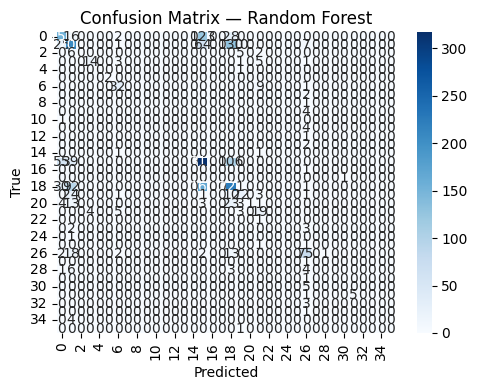

In [17]:
# 7) Models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "Naive Bayes": GaussianNB()
}

from sklearn.pipeline import Pipeline as SkPipeline  # alias to avoid confusion

def make_pipeline_for(name, model):
    if name == "Naive Bayes" and len(cat_cols) > 0:
        return SkPipeline(steps=[
            ("prep", ColumnTransformer([
                ("num", "passthrough", num_cols),
                ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
            ])),
            ("scale", StandardScaler(with_mean=False)),
            ("clf", model)
        ])
    return SkPipeline(steps=[("prep", preprocess), ("clf", model)])

rows, fitted = [], {}
for name, model in models.items():
    pipe = make_pipeline_for(name, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    rec  = recall_score(y_test, y_pred, average="weighted", zero_division=0)
    f1   = f1_score(y_test, y_pred, average="weighted", zero_division=0)
    rows.append([name, acc, prec, rec, f1])
    fitted[name] = pipe

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

summary = pd.DataFrame(rows, columns=["Model","Accuracy","Precision(w)","Recall(w)","F1(w)"])
summary = summary.sort_values("F1(w)", ascending=False).reset_index(drop=True)
print("\n=== Summary ===")
print(summary)

# 8) Best-model confusion matrix heatmap
best_model_name = summary.iloc[0]['Model']
best_pipe = fitted[best_model_name]
best_pred = best_pipe.predict(X_test)
cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix — {best_model_name}")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.tight_layout()
plt.show()


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ],
    remainder="drop"
)
print(f"Numeric cols: {len(num_cols)} | Categorical cols: {len(cat_cols)}")

# 6) Train/test & models
# Removed stratify=strat due to classes with only one member
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "Naive Bayes": GaussianNB()
}

def make_pipeline_for(name, model):
    if name == "Naive Bayes" and len(cat_cols) > 0:
        return Pipeline(steps=[
            ("prep", ColumnTransformer([
                ("num", "passthrough", num_cols),
                ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
            ])),
            ("scale", StandardScaler(with_mean=False)),
            ("clf", model)
        ])
    return Pipeline(steps=[("prep", preprocess), ("clf", model)])

rows, fitted = [], {}
for name, model in models.items():
    pipe = make_pipeline_for(name, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    rec  = recall_score(y_test, y_pred, average="weighted", zero_division=0)
    f1   = f1_score(y_test, y_pred, average="weighted", zero_division=0)
    rows.append([name, acc, prec, rec, f1])
    fitted[name] = pipe

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

summary = pd.DataFrame(rows, columns=["Model","Accuracy","Precision(w)","Recall(w)","F1(w)"])
summary = summary.sort_values("F1(w)", ascending=False).reset_index(drop=True)
print("\n=== Summary ===")
print(summary)

Numeric cols: 6 | Categorical cols: 1

=== Decision Tree ===
                                precision    recall  f1-score   support

                         Clear       0.48      0.50      0.49       322
                        Cloudy       0.47      0.46      0.47       443
                       Drizzle       1.00      0.08      0.14        13
                   Drizzle,Fog       0.37      0.29      0.33        24
                  Drizzle,Snow       0.00      0.00      0.00         1
              Drizzle,Snow,Fog       1.00      1.00      1.00         2
                           Fog       0.57      0.60      0.58        42
              Freezing Drizzle       0.00      0.00      0.00         2
         Freezing Drizzle,Haze       0.25      1.00      0.40         1
         Freezing Drizzle,Snow       0.00      0.00      0.00         4
                  Freezing Fog       0.00      0.00      0.00         1
                 Freezing Rain       0.00      0.00      0.00         4
  

<Figure size 640x480 with 0 Axes>

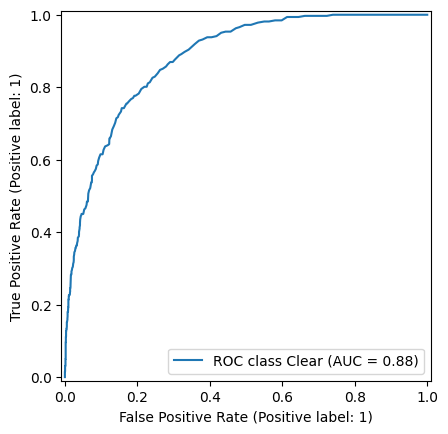

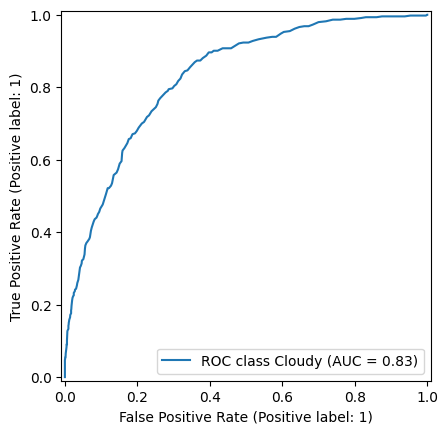

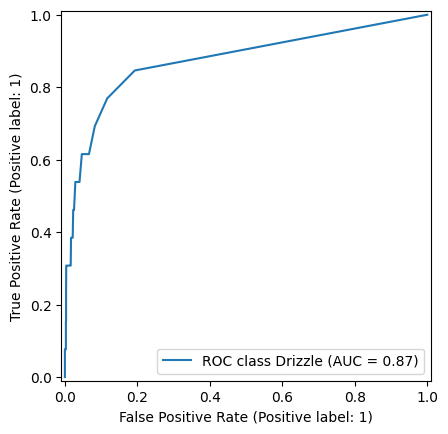

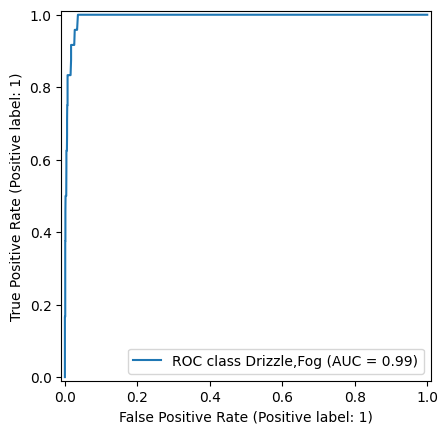

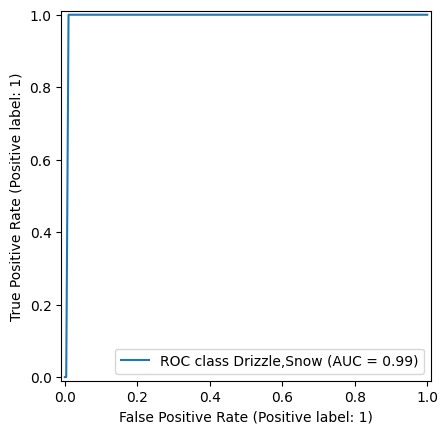

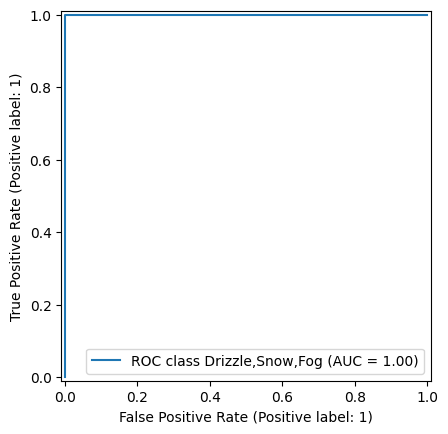

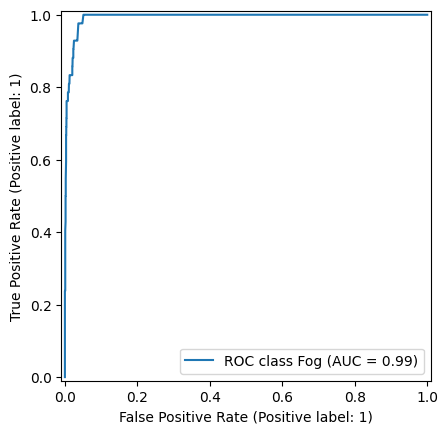

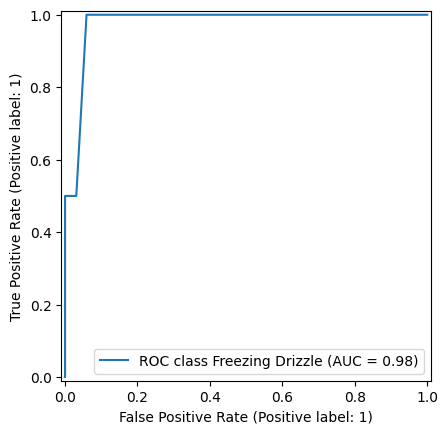

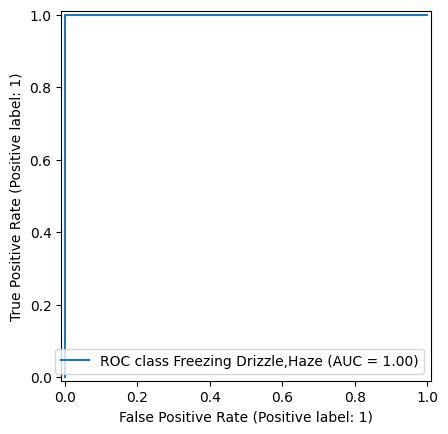

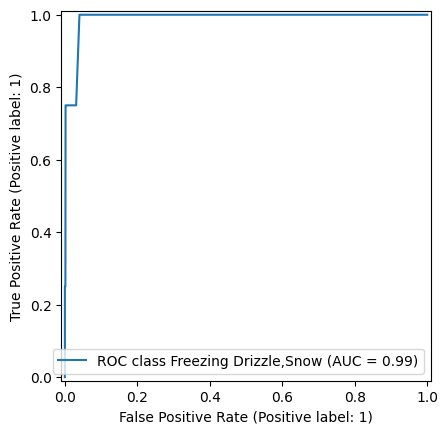

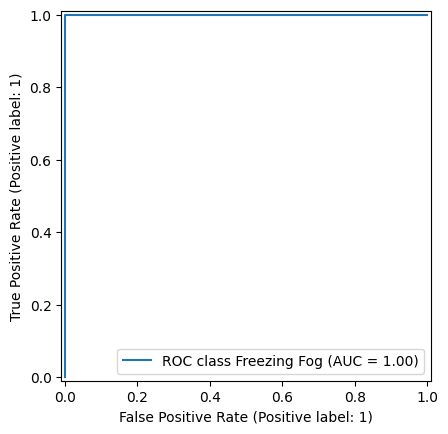

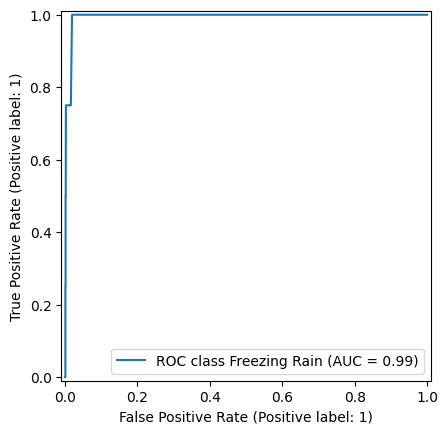

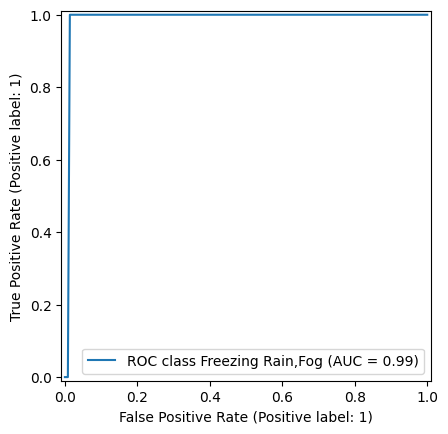

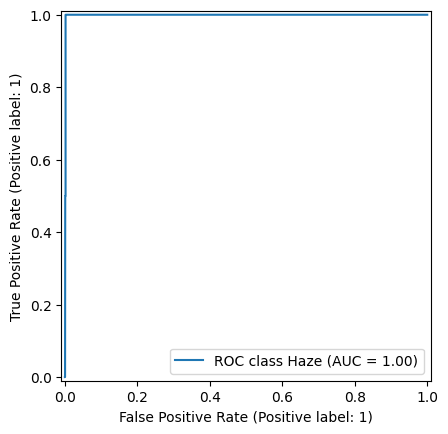

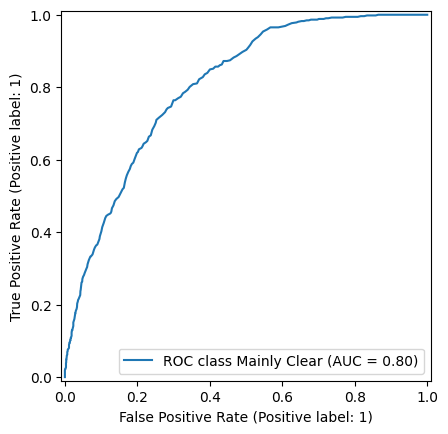

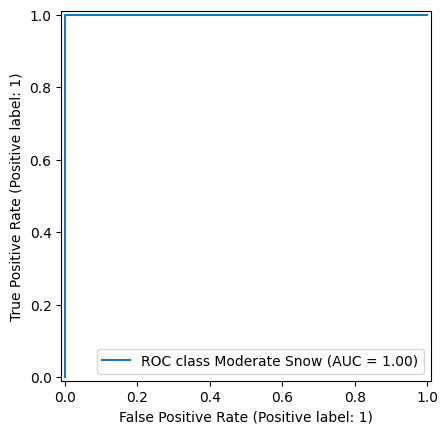

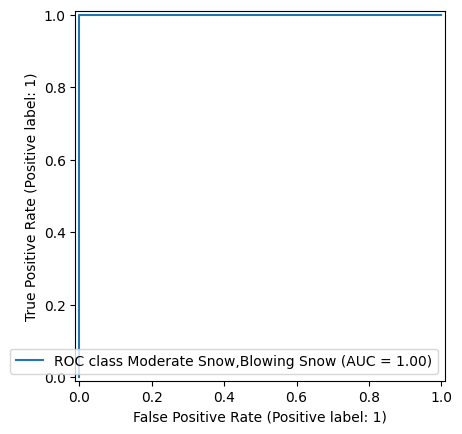

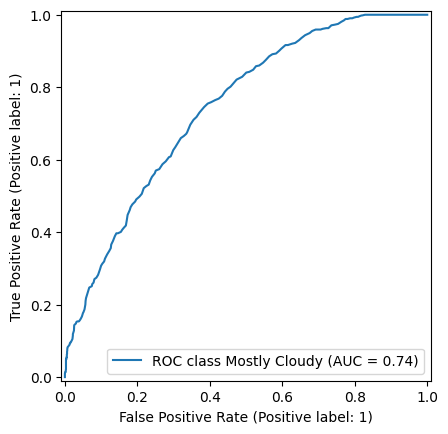

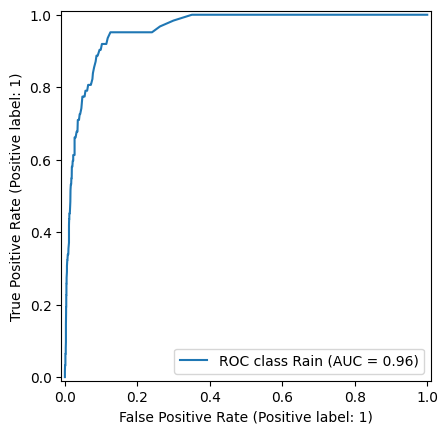

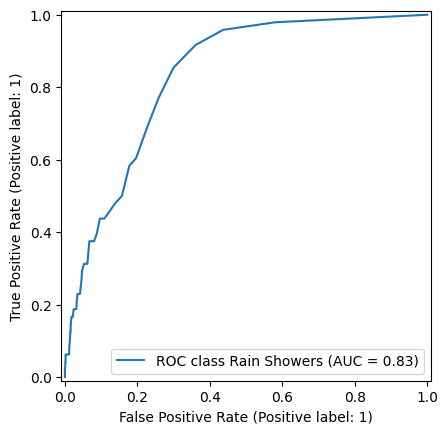

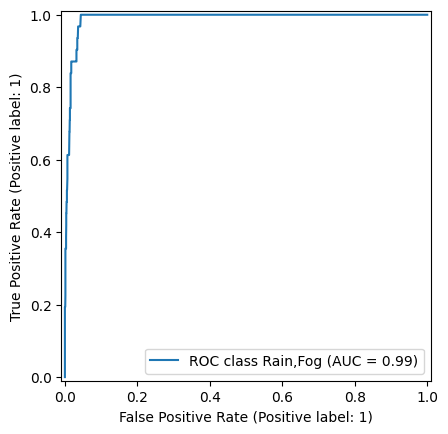

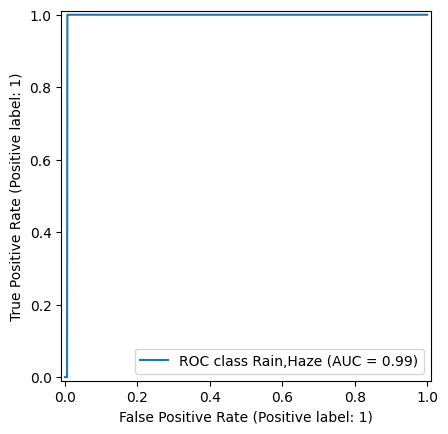

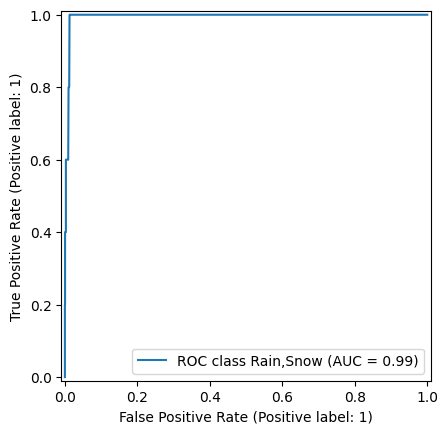

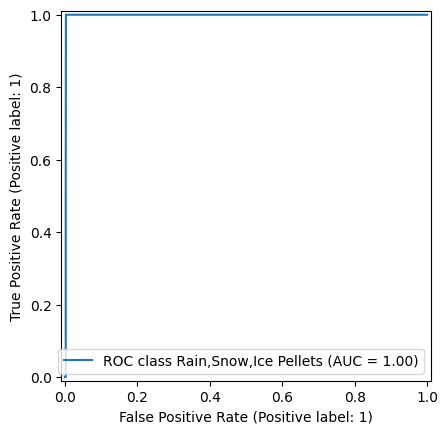

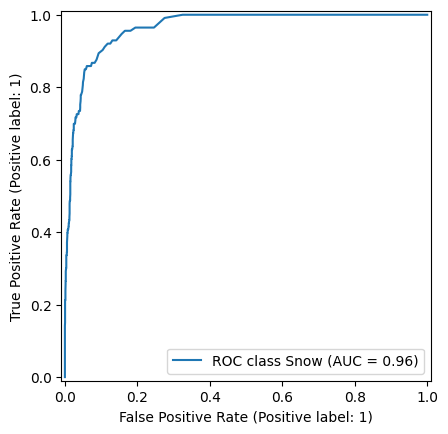

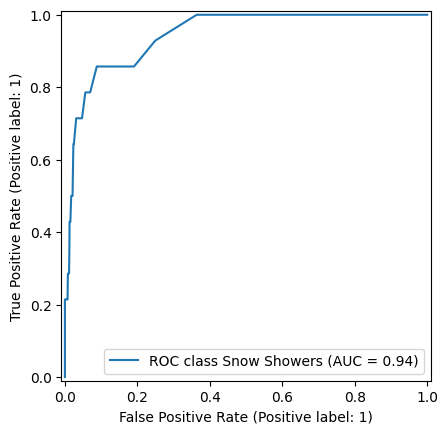

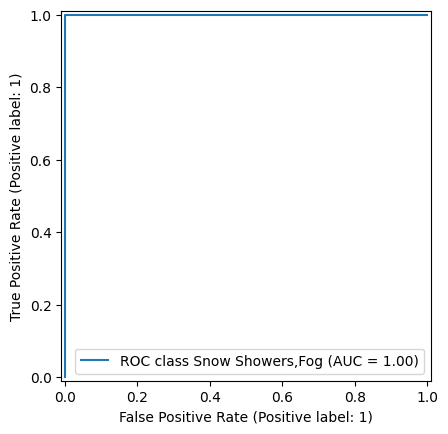

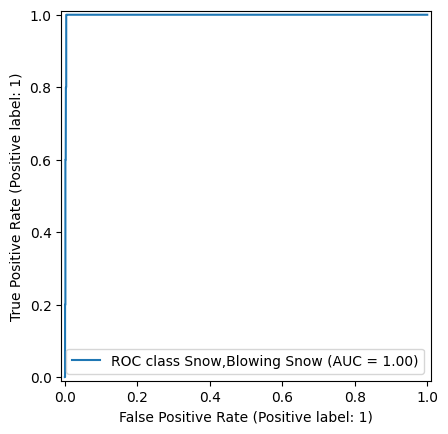

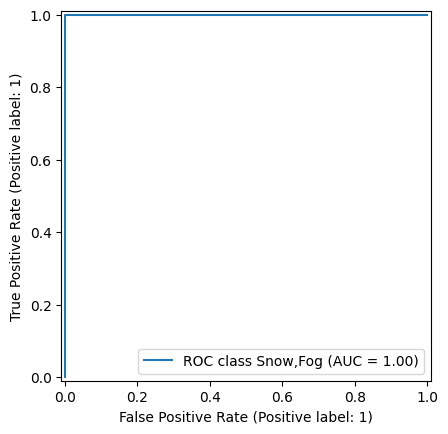

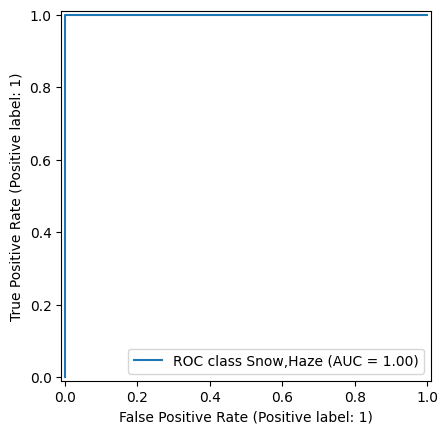

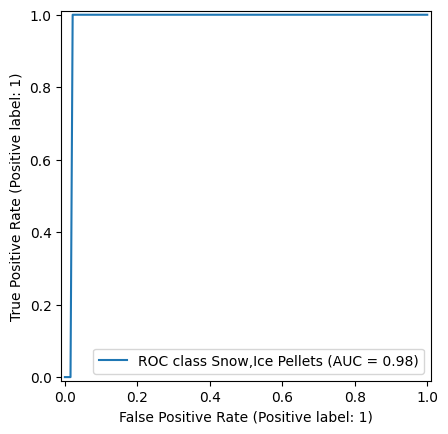

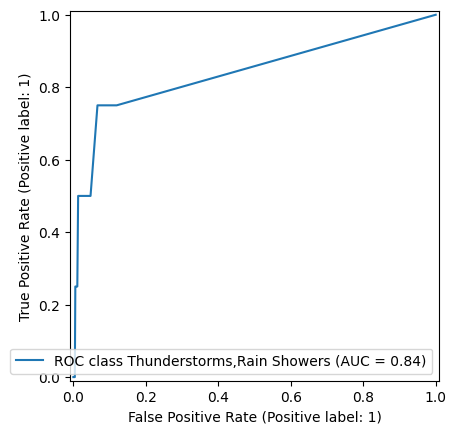

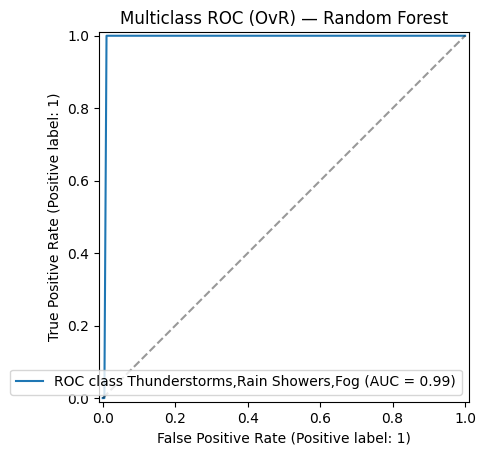

Macro AUC: 0.956 | Micro AUC: 0.974


In [20]:
# --- Multiclass ROC (OvR) with class alignment ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay, roc_auc_score

best_model_name = summary.iloc[0]['Model']
best = fitted[best_model_name]           # Pipeline
final_est = best.named_steps.get("clf", best)

# Classes known to the model and present in the test set
model_classes = np.array(getattr(final_est, "classes_", np.unique(y_train)))
test_classes  = np.unique(y_test)
common_classes = np.intersect1d(model_classes, test_classes)

if len(common_classes) < 2:
    print("[ROC] Not enough common classes between train and test to plot ROC.")
else:
    # Get scores from the pipeline in the model's class order
    if hasattr(best, "predict_proba"):
        scores_all = best.predict_proba(X_test)  # shape (n_samples, len(model_classes))
    elif hasattr(best, "decision_function"):
        s = best.decision_function(X_test)
        scores_all = s if s.ndim == 2 else np.tile(s.reshape(-1,1), (1, len(model_classes)))
    else:
        # fallback to a RF to get probabilities in model_classes space
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.pipeline import Pipeline as SkPipeline
        backup = SkPipeline(steps=[
            ("prep", best.named_steps.get("prep", preprocess)),
            ("clf", RandomForestClassifier(n_estimators=400, random_state=42))
        ])
        backup.fit(X_train, y_train)
        scores_all = backup.predict_proba(X_test)
        model_classes = np.array(getattr(backup.named_steps["clf"], "classes_", np.unique(y_train)))

    # Reindex columns to the common class set
    idx = [np.where(model_classes == c)[0][0] for c in common_classes]
    scores = scores_all[:, idx]

    # Binarize y_test using the **same** common class order
    y_test_bin = label_binarize(y_test, classes=common_classes)

    # Plot per-class ROC
    plt.figure()
    for i, c in enumerate(common_classes):
        RocCurveDisplay.from_predictions(y_test_bin[:, i], scores[:, i], name=f"ROC class {c}")
    plt.plot([0,1],[0,1],'k--',alpha=0.4)
    plt.title(f"Multiclass ROC (OvR) — {best_model_name}")
    plt.show()

    # Macro/Micro AUC on the aligned classes only
    macro_auc = roc_auc_score(y_test_bin, scores, average="macro", multi_class="ovr")
    micro_auc = roc_auc_score(y_test_bin, scores, average="micro", multi_class="ovr")
    print(f"Macro AUC: {macro_auc:.3f} | Micro AUC: {micro_auc:.3f}")


In [24]:
DO_FP_GROWTH = False  # set True to run
if DO_FP_GROWTH and _HAS_MLXTEND:
    dfn = dataset.copy()
    # pick common weather-like numeric columns
    def _numcol(pattern):
        cols = [c for c in dfn.columns if re.search(pattern, c, re.I)]
        cols = [c for c in cols if pd.api.types.is_numeric_dtype(dfn[c])]
        return cols
    temp_cols = _numcol(r"temp|temperature|max|min")
    hum_cols  = _numcol(r"hum")
    wind_cols = _numcol(r"wind")
    rain_cols = _numcol(r"rain|precip")

    def bin_token(name, series, high_q=0.75, low_q=0.25):
        s = pd.to_numeric(series, errors="coerce")
        hi, lo = s.quantile(high_q), s.quantile(low_q)
        out = []
        for v in s:
            if pd.isna(v): out.append(f"{name}_NA")
            elif v >= hi: out.append(f"{name}_High")
            elif v <= lo: out.append(f"{name}_Low")
            else: out.append(f"{name}_Mid")
        return out

    baskets = []
    n = len(dfn)
    for i in range(n):
        row_tokens = []
        if temp_cols:
            s = pd.to_numeric(dfn[temp_cols[0]], errors="coerce")
            row_tokens.append("Hot" if s.iloc[i] >= s.median() else "Cool")
        if hum_cols:
            s = pd.to_numeric(dfn[hum_cols[0]], errors="coerce")
            row_tokens.append("Humid" if s.iloc[i] >= s.median() else "DryAir")
        if wind_cols:
            s = pd.to_numeric(dfn[wind_cols[0]], errors="coerce")
            row_tokens.append("Windy" if s.iloc[i] >= s.median() else "Calm")
        if rain_cols:
            s = pd.to_numeric(dfn[rain_cols[0]], errors="coerce")
            row_tokens.append("Rain" if (pd.notna(s.iloc[i]) and s.iloc[i] > 0) else "NoRain")
        if temp_cols:
            row_tokens.append(bin_token("Temp", dfn[temp_cols[0]])[i])
        if hum_cols:
            row_tokens.append(bin_token("Hum", dfn[hum_cols[0]])[i])
        baskets.append(row_tokens)

    items = sorted({tok for row in baskets for tok in row})
    te = TransactionEncoder()
    arr = te.fit(baskets).transform(baskets)
    basket_df = pd.DataFrame(arr, columns=te.columns_).astype(bool)

    freq = fpgrowth(basket_df, min_support=0.1, use_colnames=True)
    rules = association_rules(freq, metric="lift", min_threshold=1.0)

    print("\n=== FP-Growth Frequent Itemsets (top 20) ===")
    display(freq.sort_values("support", ascending=False).head(20))

    print("\n=== FP-Growth Association Rules (top 20 by lift) ===")
    display(rules.sort_values("lift", ascending=False)
                 [["antecedents","consequents","support","confidence","lift"]]
                 .head(20))
elif DO_FP_GROWTH:
    print("[FP-Growth skipped] mlxtend not installed.")












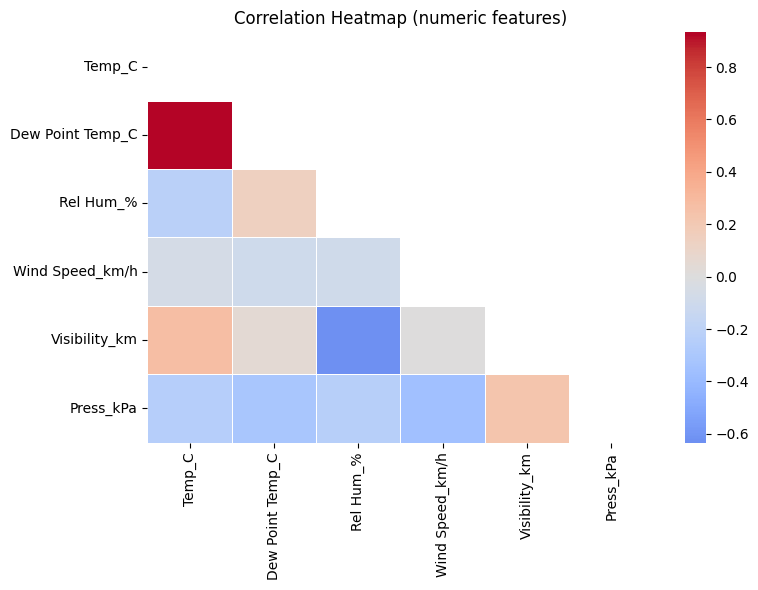

In [25]:
# --- Correlation heatmap ---
num_df = dataset.select_dtypes(include=[np.number])
if num_df.shape[1] >= 2:
    corr = num_df.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0, linewidths=0.5)
    plt.title("Correlation Heatmap (numeric features)")
    plt.tight_layout()
    plt.show()
else:
    print("[Heatmap] Not enough numeric columns to plot.")


In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline as SkPipeline

def make_preprocess():
    return ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), num_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
        ],
        remainder="drop"
    )

def make_pipeline_for(name, model):
    if name == "Naive Bayes" and len(cat_cols) > 0:
        return SkPipeline(steps=[
            ("prep", ColumnTransformer([
                ("num", "passthrough", num_cols),
                ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
            ])),
            ("scale", StandardScaler(with_mean=False)),
            ("clf", model),
        ])
    else:
        return SkPipeline(steps=[("prep", make_preprocess()), ("clf", model)])


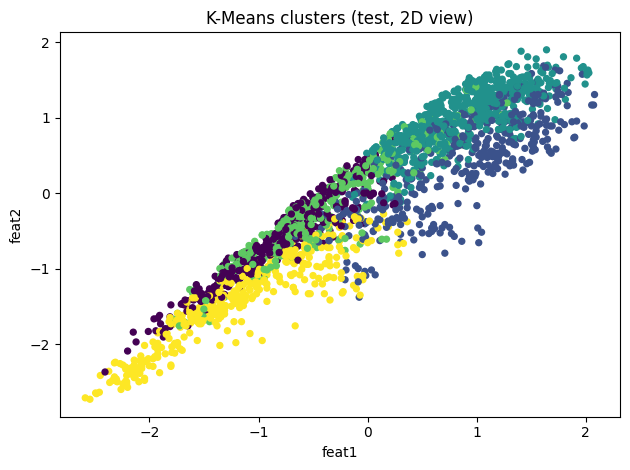

In [31]:
# Build kmeans with its own preprocessor
k = min(5, max(2, pd.Series(y).nunique() if pd.Series(y).nunique() > 1 else 3))
kmeans = SkPipeline(steps=[("prep", make_preprocess()), ("km", KMeans(n_clusters=k, n_init=20, random_state=42))])
clusters_train = kmeans.fit_predict(X_train)
clusters_test  = kmeans.predict(X_test)

# For plotting 2D view:
Xt_test = kmeans.named_steps["prep"].transform(X_test)   # transform only (no fit)
if hasattr(Xt_test, "toarray"): Xt_dense = Xt_test.toarray()
else: Xt_dense = np.asarray(Xt_test)

from sklearn.decomposition import PCA
XY = Xt_dense[:, :2] if Xt_dense.shape[1] >= 2 else PCA(n_components=2, random_state=42).fit_transform(Xt_dense)

plt.figure()
plt.scatter(XY[:,0], XY[:,1], c=clusters_test, s=18)
plt.title("K-Means clusters (test, 2D view)")
plt.xlabel("feat1"); plt.ylabel("feat2")
plt.tight_layout(); plt.show()



           Model  Accuracy  Precision(w)  Recall(w)     F1(w)
2  Random Forest  0.487250      0.486660   0.487250  0.473139
1      KNN (k=5)  0.458561      0.452442   0.458561  0.447972
0  Decision Tree  0.451275      0.450270   0.451275  0.447265
3    Naive Bayes  0.002277      0.000475   0.002277  0.000722


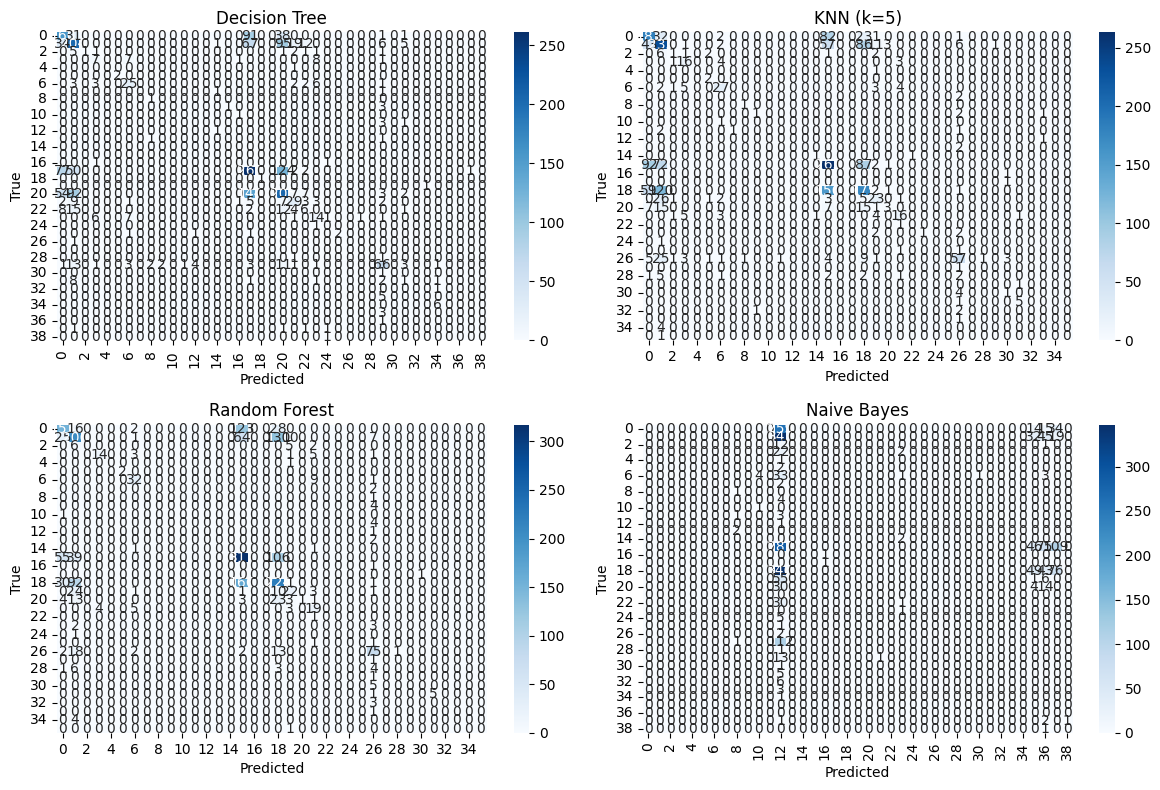

In [33]:
# ===== RESET & REFIT MODELS SAFELY (preprocessor isolated per pipeline) =====
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline as SkPipeline
from sklearn.metrics import confusion_matrix

# 1) fresh factory so every pipeline gets its OWN encoder/scaler
def make_preprocess():
    return ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), num_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ],
        remainder="drop",
        sparse_threshold=1.0,   # keep sparse OK; pipeline handles it
    )

def make_pipeline_for(name, model):
    if name == "Naive Bayes" and len(cat_cols) > 0:
        return SkPipeline(steps=[
            ("prep", ColumnTransformer([
                ("num", "passthrough", num_cols),
                ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
            ])),
            ("scale", StandardScaler(with_mean=False)),
            ("clf", model),
        ])
    else:
        return SkPipeline(steps=[("prep", make_preprocess()), ("clf", model)])

# 2) rebuild & refit (do NOT reuse old 'fitted')
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "Naive Bayes": GaussianNB(),
}

fitted = {}
rows = []
for name, model in models.items():
    pipe = make_pipeline_for(name, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    rec  = recall_score(y_test, y_pred, average="weighted", zero_division=0)
    f1   = f1_score(y_test, y_pred, average="weighted", zero_division=0)
    rows.append([name, acc, prec, rec, f1])

    fitted[name] = pipe

summary = pd.DataFrame(rows, columns=["Model","Accuracy","Precision(w)","Recall(w)","F1(w)"]).sort_values("F1(w)", ascending=False)
print(summary)

# 3) CONFUSION MATRICES (use each pipeline's OWN fitted preprocessor)
n = len(fitted)
cols = 2
rows = int(np.ceil(n/cols))
plt.figure(figsize=(6*cols, 4*rows))

for i, (name, pipe) in enumerate(fitted.items(), 1):
    y_pred = pipe.predict(X_test)  # safe now
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(rows, cols, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(name)
    plt.xlabel("Predicted"); plt.ylabel("True")

plt.tight_layout()
plt.show()


<Figure size 700x600 with 0 Axes>

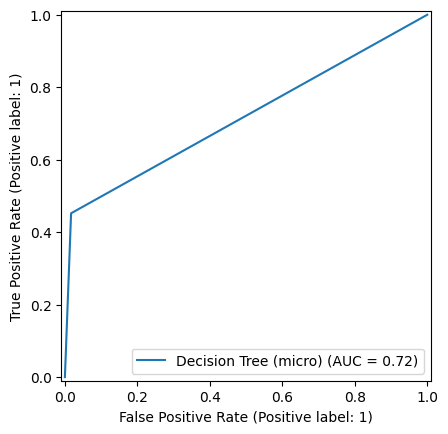

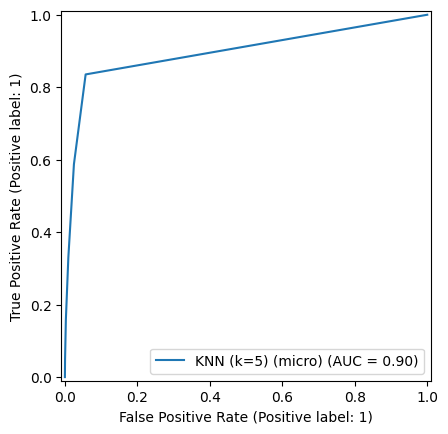

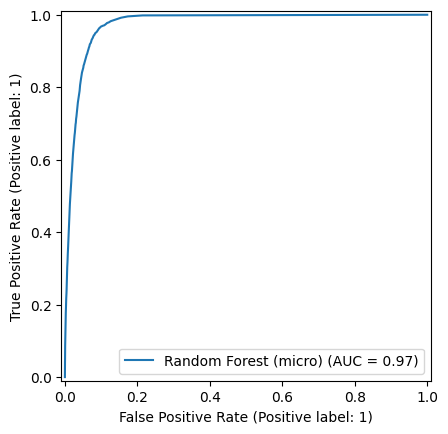

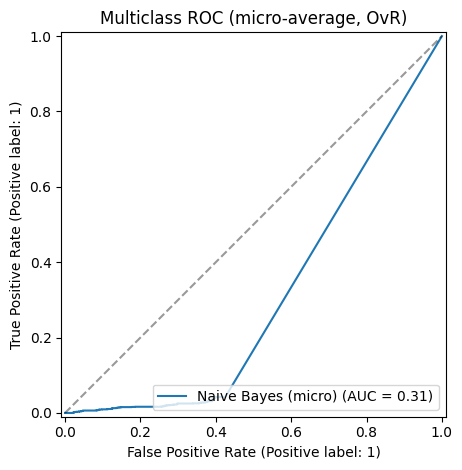

In [35]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.preprocessing import label_binarize

def model_scores(pipe, X):
    """Return per-class scores (probabilities or decision_function).
       Works with Pipeline; falls back gracefully."""
    if hasattr(pipe, "predict_proba"):
        s = pipe.predict_proba(X)
        # Some wrappers return list-of-arrays; convert to (n_samples, n_classes)
        if isinstance(s, list):
            s = np.column_stack([p[:, 1] for p in s])
        return s
    if hasattr(pipe, "decision_function"):
        s = pipe.decision_function(X)
        if s.ndim == 1:
            s = np.column_stack([1 - s, s])
        return s
    # fallback: try RandomForest on the same preprocessing
    from sklearn.pipeline import Pipeline as SkPipeline
    from sklearn.ensemble import RandomForestClassifier
    backup = SkPipeline(steps=[
        ("prep", pipe.named_steps.get("prep", preprocess)),
        ("clf", RandomForestClassifier(n_estimators=400, random_state=42))
    ])
    backup.fit(X_train, y_train)
    return backup.predict_proba(X)

classes_test = np.unique(y_test)
n_classes = len(classes_test)

plt.figure(figsize=(7,6))

if n_classes == 2:
    # --- Binary: plot all models on one ROC ---
    for name, pipe in fitted.items():
        try:
            RocCurveDisplay.from_estimator(pipe, X_test, y_test, name=name)
        except Exception:
            # manual path if from_estimator fails
            s = model_scores(pipe, X_test)[:, 1]
            RocCurveDisplay.from_predictions(y_test, s, name=name)
    plt.plot([0,1],[0,1],'k--',alpha=0.4)
    plt.title("ROC Curves (Binary)")
    plt.tight_layout()
    plt.show()

else:
    # --- Multiclass: plot MICRO-average OvR per model ---
    y_bin = label_binarize(y_test, classes=classes_test)  # (n_samples, n_classes)
    for name, pipe in fitted.items():
        # align scores columns to classes_test
        s_all = model_scores(pipe, X_test)
        # find model class order
        est = pipe.named_steps.get("clf", pipe)
        model_classes = getattr(est, "classes_", classes_test)
        # subset/align to intersection
        common = np.intersect1d(model_classes, classes_test)
        if len(common) < 2:
            print(f"[ROC] Skipping {name}: not enough common classes.")
            continue
        idx_model = [np.where(model_classes == c)[0][0] for c in common]
        idx_test  = [np.where(classes_test   == c)[0][0] for c in common]
        s = s_all[:, idx_model]
        yb = y_bin[:, idx_test]

        # micro-average: flatten
        RocCurveDisplay.from_predictions(yb.ravel(), s.ravel(), name=f"{name} (micro)")
    plt.plot([0,1],[0,1],'k--',alpha=0.4)
    plt.title("Multiclass ROC (micro-average, OvR)")
    plt.tight_layout()
    plt.show()


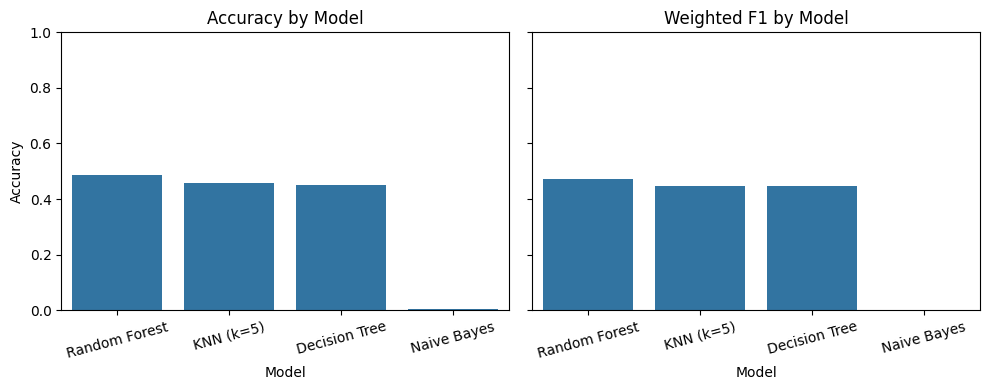

In [36]:
# --- Bar plots for metrics ---
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)
sns.barplot(data=summary, x="Model", y="Accuracy", ax=axes[0])
axes[0].set_title("Accuracy by Model")
axes[0].set_ylim(0, 1)
axes[0].tick_params(axis='x', rotation=15)

sns.barplot(data=summary, x="Model", y="F1(w)", ax=axes[1])
axes[1].set_title("Weighted F1 by Model")
axes[1].set_ylim(0, 1)
axes[1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


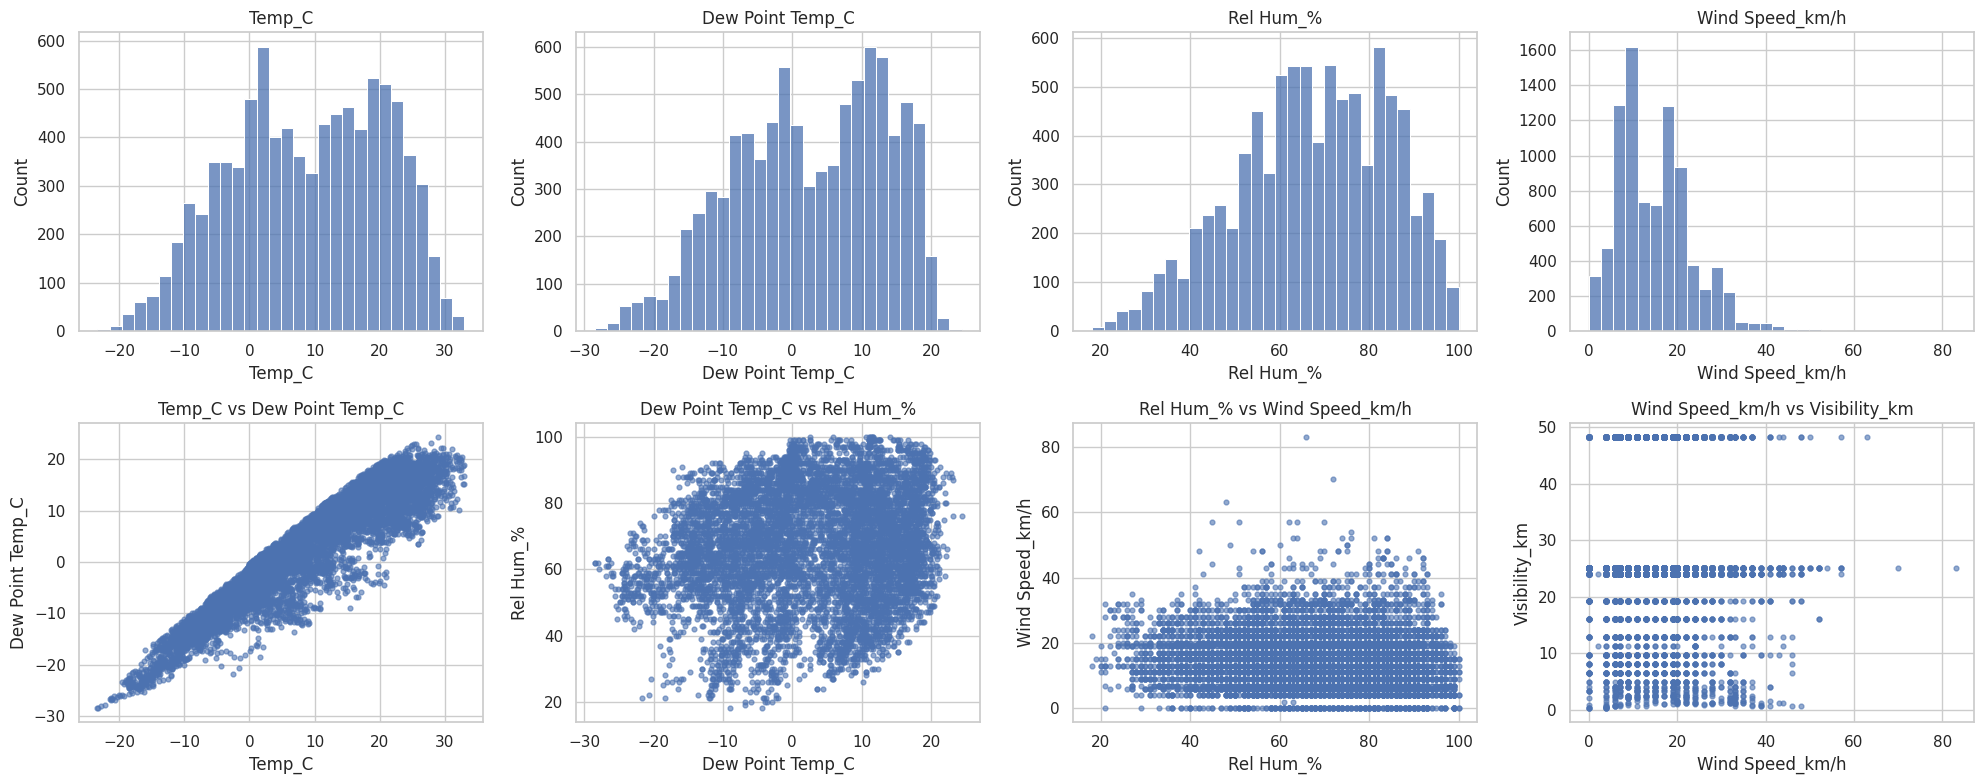

In [37]:
# === 8-panel EDA dashboard (4 histograms + 4 scatter plots) ===
import matplotlib.pyplot as plt
import seaborn as sns

# Change these if your column names differ
COL_TEMP = "Temp_C"
COL_DEW  = "Dew Point Temp_C"
COL_RH   = "Rel Hum_%"
COL_WS   = "Wind Speed_km/h"
COL_VIS  = "Visibility_km"

# sanity check
need = [COL_TEMP, COL_DEW, COL_RH, COL_WS, COL_VIS]
missing = [c for c in need if c not in dataset.columns]
if missing:
    raise ValueError(f"Missing columns in dataset: {missing}")

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# -------- Row 1: Histograms --------
sns.histplot(dataset[COL_TEMP], bins=30, ax=axes[0,0])
axes[0,0].set_title(COL_TEMP)

sns.histplot(dataset[COL_DEW], bins=30, ax=axes[0,1])
axes[0,1].set_title(COL_DEW)

sns.histplot(dataset[COL_RH], bins=30, ax=axes[0,2])
axes[0,2].set_title(COL_RH)

sns.histplot(dataset[COL_WS], bins=30, ax=axes[0,3])
axes[0,3].set_title(COL_WS)

# -------- Row 2: Scatter plots --------
axes[1,0].scatter(dataset[COL_TEMP], dataset[COL_DEW], s=12, alpha=0.6)
axes[1,0].set_xlabel(COL_TEMP); axes[1,0].set_ylabel(COL_DEW)
axes[1,0].set_title(f"{COL_TEMP} vs {COL_DEW}")

axes[1,1].scatter(dataset[COL_DEW], dataset[COL_RH], s=12, alpha=0.6)
axes[1,1].set_xlabel(COL_DEW); axes[1,1].set_ylabel(COL_RH)
axes[1,1].set_title(f"{COL_DEW} vs {COL_RH}")

axes[1,2].scatter(dataset[COL_RH], dataset[COL_WS], s=12, alpha=0.6)
axes[1,2].set_xlabel(COL_RH); axes[1,2].set_ylabel(COL_WS)
axes[1,2].set_title(f"{COL_RH} vs {COL_WS}")

axes[1,3].scatter(dataset[COL_WS], dataset[COL_VIS], s=12, alpha=0.6)
axes[1,3].set_xlabel(COL_WS); axes[1,3].set_ylabel(COL_VIS)
axes[1,3].set_title(f"{COL_WS} vs {COL_VIS}")

plt.tight_layout()
plt.show()




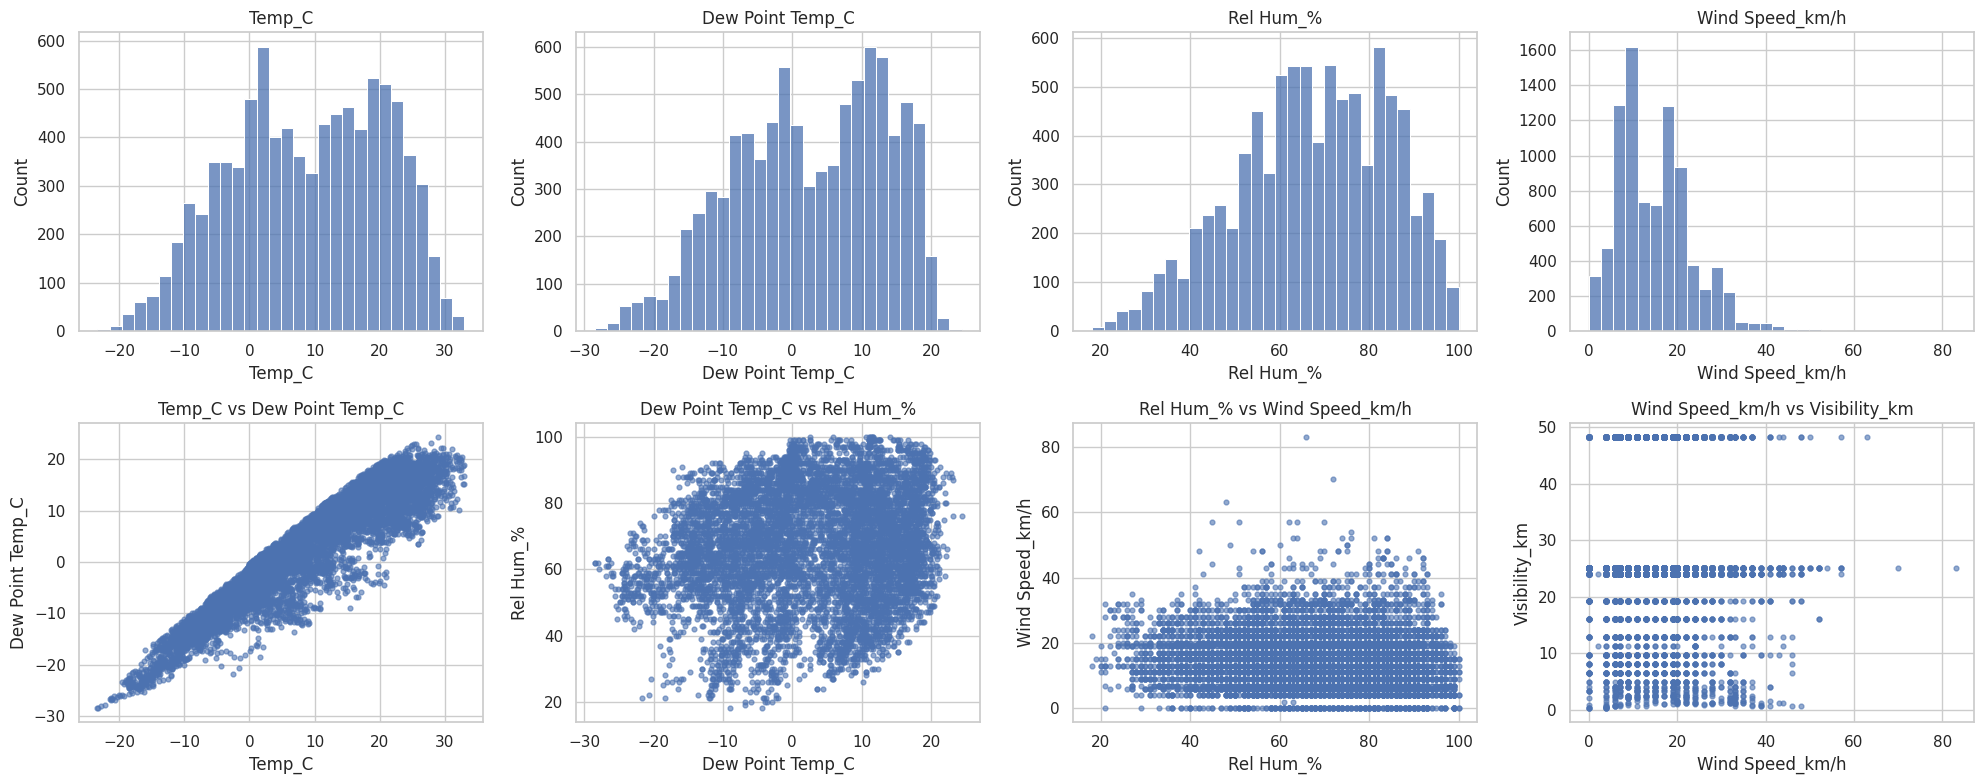

[saved] /content/weather_plots/eda_8_panels.png


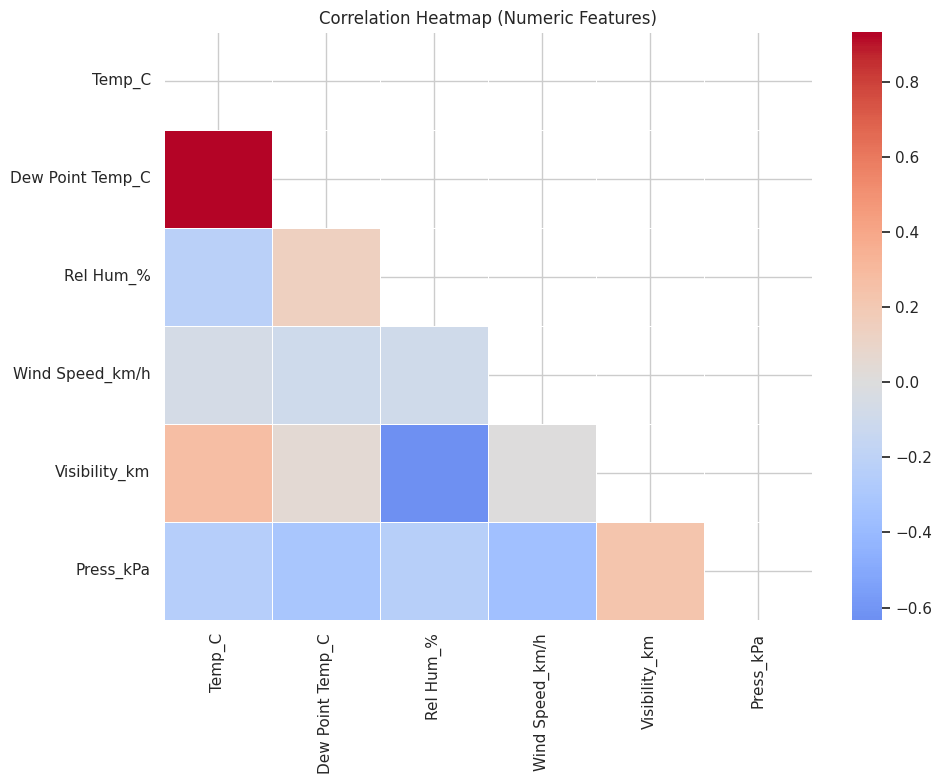

[saved] /content/weather_plots/corr_heatmap.png


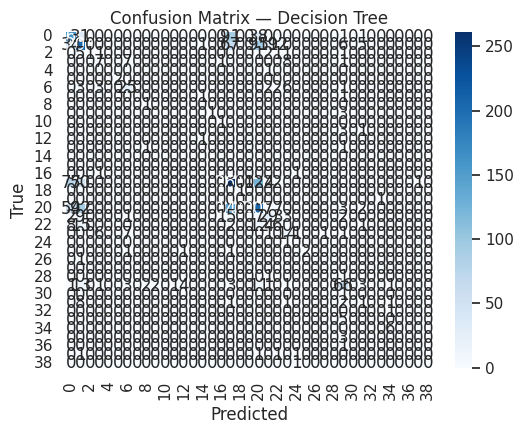

[saved] /content/weather_plots/cm_decision_tree.png


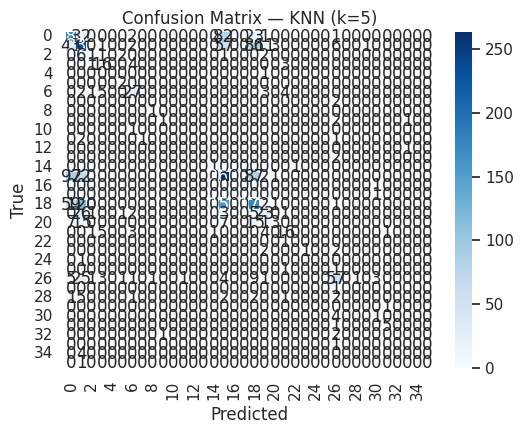

[saved] /content/weather_plots/cm_knn_(k=5).png


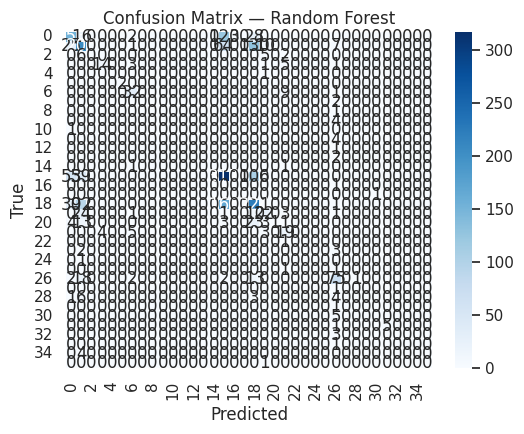

[saved] /content/weather_plots/cm_random_forest.png


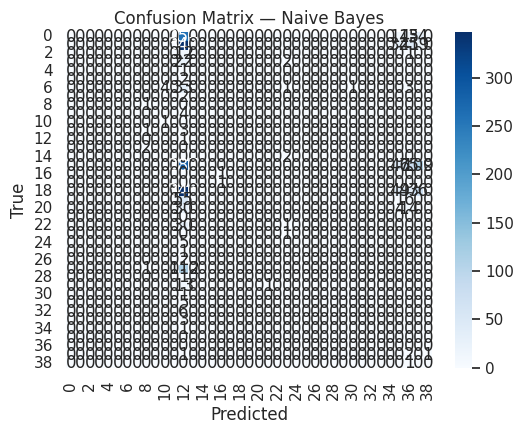

[saved] /content/weather_plots/cm_naive_bayes.png


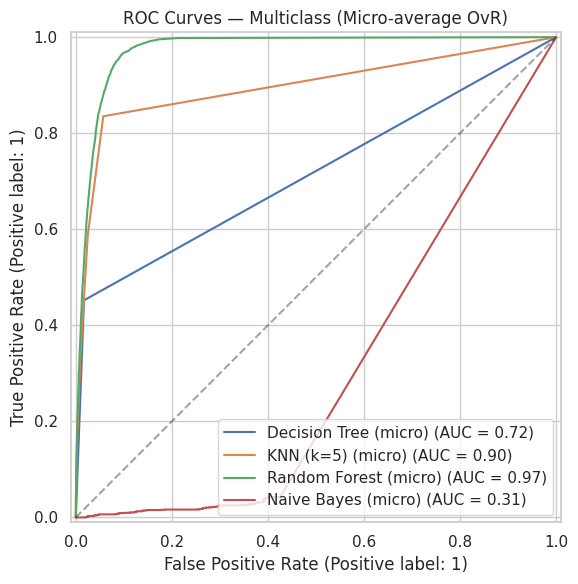

[saved] /content/weather_plots/roc_all_models_multiclass_micro.png


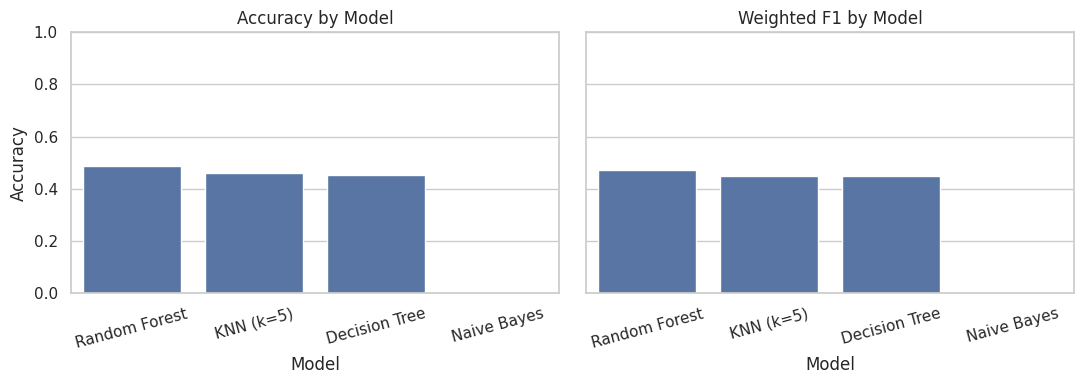

[saved] /content/weather_plots/comparison_accuracy_f1.png


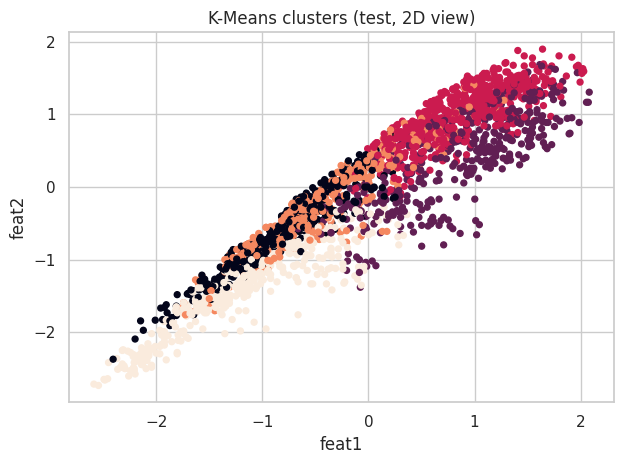

[saved] /content/weather_plots/kmeans_2d_view.png

All images saved to: /content/weather_plots


In [39]:
# ================= SAVE-ALL PLOTS (Colab-ready) =================
# Assumes you already have: dataset, fitted (dict of pipelines), summary,
# X_train, X_test, y_train, y_test, and (optionally) kmeans.
# This cell will generate + SAVE: 8-panel EDA, correlation heatmap,
# confusion matrices (all models), ROC curves (binary/multiclass),
# comparison bars (Accuracy & F1), and K-Means 2D view.

import os, json, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from datetime import datetime
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA

# ---------- 0) Setup ----------
sns.set_theme(style="whitegrid")
SAVE_DIR = "/content/weather_plots"
os.makedirs(SAVE_DIR, exist_ok=True)
def save_and_show(fig, name):
    path = os.path.join(SAVE_DIR, f"{name}.png")
    fig.savefig(path, dpi=300, bbox_inches="tight")
    plt.show()
    print(f"[saved] {path}")

# ---------- 1) 8-panel EDA (edit columns if needed) ----------
COL_TEMP = "Temp_C"
COL_DEW  = "Dew Point Temp_C"
COL_RH   = "Rel Hum_%"
COL_WS   = "Wind Speed_km/h"
COL_VIS  = "Visibility_km"

try:
    need = [COL_TEMP, COL_DEW, COL_RH, COL_WS, COL_VIS]
    if not all(c in dataset.columns for c in need):
        raise KeyError(f"Missing columns: {[c for c in need if c not in dataset.columns]}")
    fig, axes = plt.subplots(2, 4, figsize=(20, 8))
    sns.histplot(dataset[COL_TEMP], bins=30, ax=axes[0,0]); axes[0,0].set_title(COL_TEMP)
    sns.histplot(dataset[COL_DEW],  bins=30, ax=axes[0,1]); axes[0,1].set_title(COL_DEW)
    sns.histplot(dataset[COL_RH],   bins=30, ax=axes[0,2]); axes[0,2].set_title(COL_RH)
    sns.histplot(dataset[COL_WS],   bins=30, ax=axes[0,3]); axes[0,3].set_title(COL_WS)

    axes[1,0].scatter(dataset[COL_TEMP], dataset[COL_DEW], s=12, alpha=0.6)
    axes[1,0].set_xlabel(COL_TEMP); axes[1,0].set_ylabel(COL_DEW); axes[1,0].set_title(f"{COL_TEMP} vs {COL_DEW}")

    axes[1,1].scatter(dataset[COL_DEW], dataset[COL_RH], s=12, alpha=0.6)
    axes[1,1].set_xlabel(COL_DEW); axes[1,1].set_ylabel(COL_RH); axes[1,1].set_title(f"{COL_DEW} vs {COL_RH}")

    axes[1,2].scatter(dataset[COL_RH], dataset[COL_WS], s=12, alpha=0.6)
    axes[1,2].set_xlabel(COL_RH); axes[1,2].set_ylabel(COL_WS); axes[1,2].set_title(f"{COL_RH} vs {COL_WS}")

    axes[1,3].scatter(dataset[COL_WS], dataset[COL_VIS], s=12, alpha=0.6)
    axes[1,3].set_xlabel(COL_WS); axes[1,3].set_ylabel(COL_VIS); axes[1,3].set_title(f"{COL_WS} vs {COL_VIS}")

    plt.tight_layout()
    save_and_show(fig, "eda_8_panels")
except Exception as e:
    print("[8-panel EDA] skipped ->", e)

# ---------- 2) Correlation heatmap (numeric only) ----------
num_df = dataset.select_dtypes(include=[np.number])
if num_df.shape[1] >= 2:
    corr = num_df.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0, linewidths=0.5, ax=ax)
    ax.set_title("Correlation Heatmap (Numeric Features)")
    plt.tight_layout()
    save_and_show(fig, "corr_heatmap")
else:
    print("[heatmap] Not enough numeric columns.")

# ---------- 3) Confusion matrices (each model) ----------
for name, pipe in fitted.items():
    y_pred = pipe.predict(X_test)  # uses each pipeline's own fitted preprocessor
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(5.5, 4.5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"Confusion Matrix — {name}")
    ax.set_xlabel("Predicted"); ax.set_ylabel("True")
    plt.tight_layout()
    save_and_show(fig, f"cm_{name.replace(' ','_').lower()}")

# ---------- 4) ROC curves (binary: all models; multiclass: micro-avg OvR per model) ----------
def model_scores(pipe, X):
    if hasattr(pipe, "predict_proba"):
        s = pipe.predict_proba(X)
        if isinstance(s, list):  # e.g., OneVsRest returns list of arrays
            s = np.column_stack([p[:, 1] for p in s])
        return s
    if hasattr(pipe, "decision_function"):
        s = pipe.decision_function(X)
        if s.ndim == 1:  # binary margin
            s = np.column_stack([1 - s, s])
        return s
    return None

classes_test = np.unique(y_test)
n_classes = len(classes_test)

if n_classes == 2:
    fig, ax = plt.subplots(figsize=(7, 6))
    for name, pipe in fitted.items():
        try:
            RocCurveDisplay.from_estimator(pipe, X_test, y_test, name=name, ax=ax)
        except Exception:
            s = model_scores(pipe, X_test)
            if s is not None:
                RocCurveDisplay.from_predictions(y_test, s[:, 1], name=name, ax=ax)
    ax.plot([0,1],[0,1],'k--',alpha=0.4)
    ax.set_title("ROC Curves (Binary)")
    plt.tight_layout()
    save_and_show(fig, "roc_all_models_binary")
else:
    # Multiclass micro-average per model with class alignment
    yb = label_binarize(y_test, classes=classes_test)
    fig, ax = plt.subplots(figsize=(7, 6))
    for name, pipe in fitted.items():
        s_all = model_scores(pipe, X_test)
        if s_all is None:
            try:
                RocCurveDisplay.from_estimator(pipe, X_test, y_test, name=f"{name} (micro)", ax=ax)
            except Exception:
                print(f"[ROC] skipped {name}")
            continue
        est = pipe.named_steps.get("clf", pipe)
        model_classes = getattr(est, "classes_", classes_test)
        common = np.intersect1d(model_classes, classes_test)
        if len(common) < 2:
            print(f"[ROC] skipped {name}: not enough common classes.")
            continue
        idx_model = [np.where(model_classes == c)[0][0] for c in common]
        idx_test  = [np.where(classes_test   == c)[0][0] for c in common]
        s = s_all[:, idx_model]
        yb_common = yb[:, idx_test]
        RocCurveDisplay.from_predictions(yb_common.ravel(), s.ravel(), name=f"{name} (micro)", ax=ax)
    ax.plot([0,1],[0,1],'k--',alpha=0.4)
    ax.set_title("ROC Curves — Multiclass (Micro-average OvR)")
    plt.tight_layout()
    save_and_show(fig, "roc_all_models_multiclass_micro")

# ---------- 5) Comparison bars (Accuracy & F1) ----------
fig, axes = plt.subplots(1, 2, figsize=(11, 4), sharey=True)
sns.barplot(data=summary, x="Model", y="Accuracy", ax=axes[0])
axes[0].set_title("Accuracy by Model"); axes[0].set_ylim(0, 1); axes[0].tick_params(axis='x', rotation=15)
sns.barplot(data=summary, x="Model", y="F1(w)", ax=axes[1])
axes[1].set_title("Weighted F1 by Model"); axes[1].set_ylim(0, 1); axes[1].tick_params(axis='x', rotation=15)
plt.tight_layout()
save_and_show(fig, "comparison_accuracy_f1")

# ---------- 6) K-Means: 2D view using its own preprocessor (if available) ----------
try:
    # If you created kmeans as a Pipeline with a 'prep' step earlier:
    Xt_test = kmeans.named_steps["prep"].transform(X_test)
    Xt_dense = Xt_test.toarray() if hasattr(Xt_test, "toarray") else np.asarray(Xt_test)
    XY = Xt_dense[:, :2] if Xt_dense.shape[1] >= 2 else PCA(n_components=2, random_state=42).fit_transform(Xt_dense)
    clusters_test = kmeans.predict(X_test)
    fig, ax = plt.subplots()
    sc = ax.scatter(XY[:, 0], XY[:, 1], c=clusters_test, s=18)
    ax.set_title("K-Means clusters (test, 2D view)")
    ax.set_xlabel("feat1"); ax.set_ylabel("feat2")
    plt.tight_layout()
    save_and_show(fig, "kmeans_2d_view")
except Exception as e:
    print("[K-Means 2D] skipped ->", e)

print("\nAll images saved to:", SAVE_DIR)



In [45]:
# OPTIONAL: Zip & download everything immediately
import shutil
# Create zip of the SAVE_DIR folder
zip_path = shutil.make_archive(SAVE_DIR, "zip", SAVE_DIR)

# Download the zip in Colab
from google.colab import files
files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

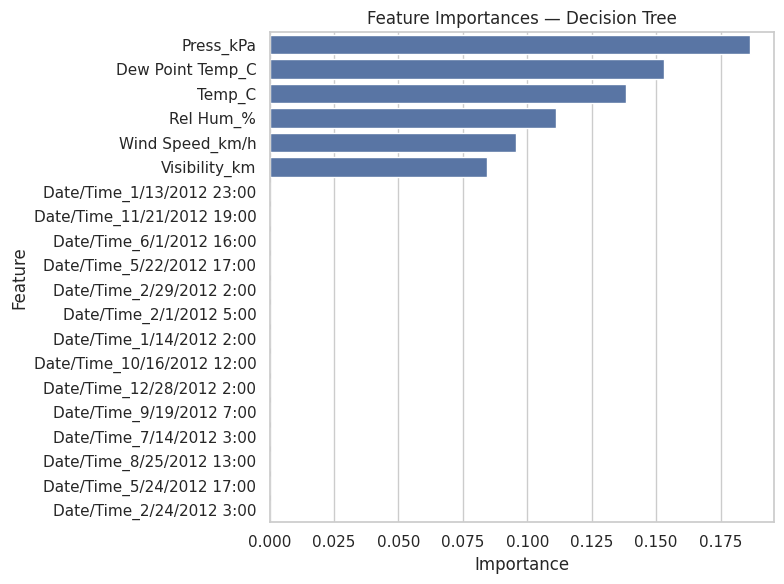

[saved] /content/weather_plots/feature_importance_decision_tree.png


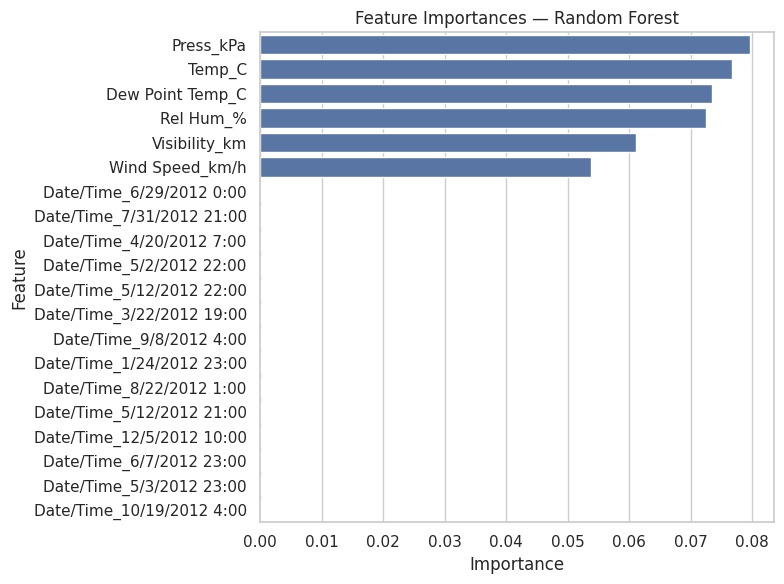

[saved] /content/weather_plots/feature_importance_random_forest.png


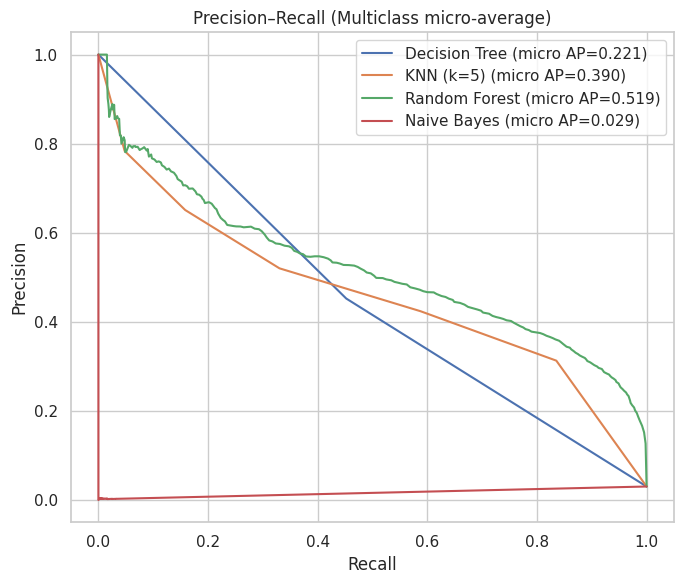

[saved] /content/weather_plots/pr_curves_multiclass_micro_all_models.png


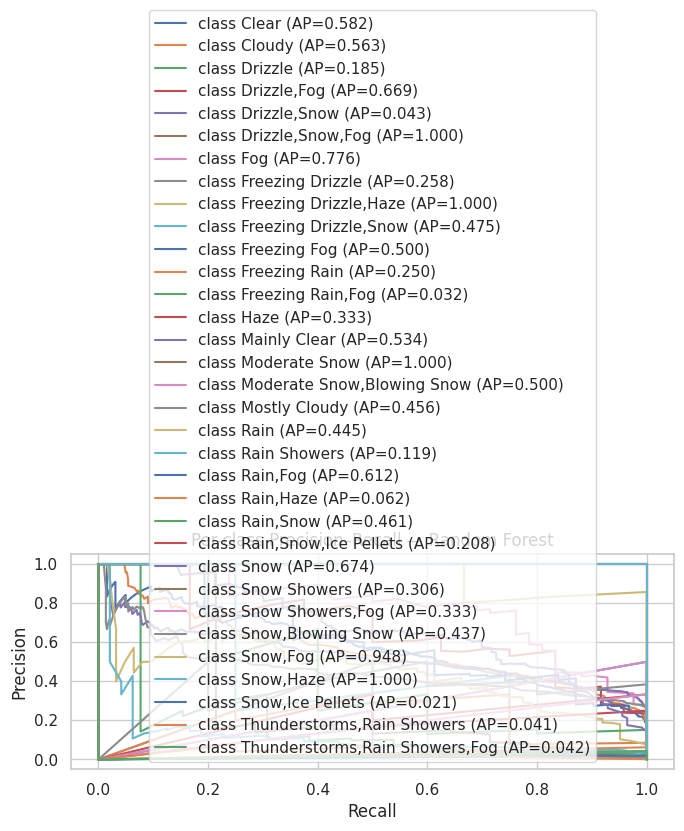

[saved] /content/weather_plots/pr_curves_per_class_random_forest.png


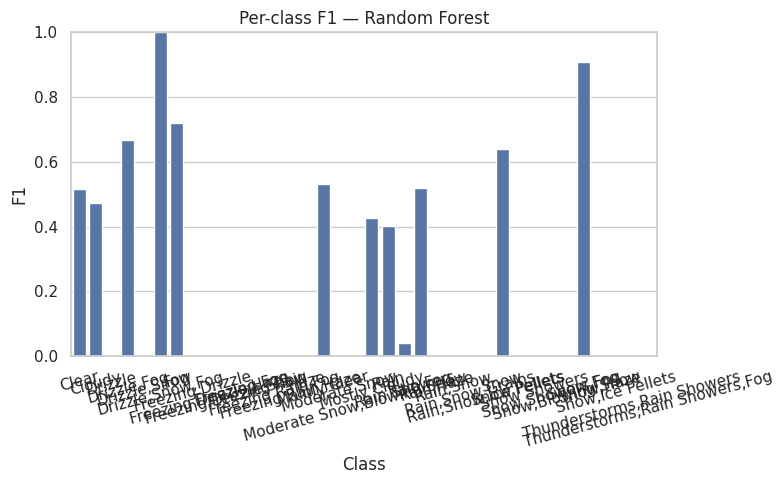

[saved] /content/weather_plots/per_class_f1_random_forest.png


In [41]:
# ================= FEATURE IMPORTANCES, PR CURVES, PER-CLASS F1 =================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    precision_recall_curve, average_precision_score,
    classification_report
)
from sklearn.preprocessing import label_binarize
from sklearn.inspection import permutation_importance

sns.set_theme(style="whitegrid")

# -------------------------------------------------------------------
# Helper: get transformed feature names from a fitted pipeline's prep
# -------------------------------------------------------------------
def get_feature_names_from_pipeline(pipe):
    """
    Returns list of feature names after the 'prep' step of a fitted pipeline.
    Works with ColumnTransformer(num: StandardScaler, cat: OneHotEncoder).
    """
    if "prep" not in pipe.named_steps:
        # No preprocessor; just return original columns
        return list(X_train.columns)

    ct = pipe.named_steps["prep"]
    names = []

    # ColumnTransformer stores transformers_ after fitting
    for name, trans, cols in ct.transformers_:
        if name == 'remainder' and trans == 'drop':
            continue
        if hasattr(trans, 'get_feature_names_out'):
            try:
                fn = trans.get_feature_names_out(cols)
            except:
                fn = trans.get_feature_names_out()
            names.extend(fn)
        else:
            # passthrough or scaler; just use the original column names
            if cols == 'drop' or cols is None:
                continue
            if isinstance(cols, (list, tuple, np.ndarray, pd.Index)):
                names.extend(list(cols))
            else:
                names.append(cols)

    return [str(n) for n in names]

# -----------------------------------------------------------------------------
# 1) FEATURE IMPORTANCES
#    - For DecisionTree/RandomForest (native importances)
#    - Optional: permutation importance for KNN/NB (can be slow) -> toggle
# -----------------------------------------------------------------------------
DO_PERM_IMPORTANCE = False   # set True if you also want KNN/NB importances via permutation

for name, pipe in fitted.items():
    est = pipe.named_steps.get("clf", pipe)
    feature_names = get_feature_names_from_pipeline(pipe)

    importances = None
    label = None

    # Native tree-based importances
    if hasattr(est, "feature_importances_"):
        importances = est.feature_importances_
        label = f"Feature Importances — {name}"

    # Optional permutation importance for non-trees
    elif DO_PERM_IMPORTANCE:
        print(f"[Permutation importance] Computing for {name} (may take a while)...")
        # use the pipeline end-to-end (it handles preprocessing)
        r = permutation_importance(pipe, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
        importances = r.importances_mean
        label = f"Permutation Importances — {name}"

    # Plot if we have importances
    if importances is not None:
        # Align length (OneHot can expand a lot)
        if len(importances) != len(feature_names):
            # try best-effort alignment; if impossible, fallback to range
            feature_names = [f"f{i}" for i in range(len(importances))]
        imp_df = pd.DataFrame({"feature": feature_names, "importance": importances})
        imp_df = imp_df.sort_values("importance", ascending=False).head(20)

        plt.figure(figsize=(8, 6))
        sns.barplot(data=imp_df, x="importance", y="feature")
        plt.title(label)
        plt.xlabel("Importance"); plt.ylabel("Feature")
        plt.tight_layout()
        try:
            save_and_show(plt.gcf(), f"feature_importance_{name.replace(' ','_').lower()}")
        except NameError:
            plt.show()

# -----------------------------------------------------------------------------
# 2) PRECISION–RECALL CURVES
#    - Binary: plot all models on one PR chart
#    - Multiclass: micro-average OvR per model + per-class PR for best model
# -----------------------------------------------------------------------------
def get_scores(pipe, X):
    """Return per-class scores (probabilities or decision_function)."""
    if hasattr(pipe, "predict_proba"):
        s = pipe.predict_proba(X)
        if isinstance(s, list):
            s = np.column_stack([p[:, 1] for p in s])
        return s
    if hasattr(pipe, "decision_function"):
        s = pipe.decision_function(X)
        if s.ndim == 1:
            s = np.column_stack([1 - s, s])
        return s
    return None

classes_test = np.unique(y_test)
n_classes = len(classes_test)

# Binary PR for all models
if n_classes == 2:
    plt.figure(figsize=(7, 6))
    for name, pipe in fitted.items():
        s = get_scores(pipe, X_test)
        if s is None:
            continue
        y_score = s[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_score)
        ap = average_precision_score(y_test, y_score)
        plt.plot(recall, precision, label=f"{name} (AP={ap:.3f})")
    plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.title("Precision–Recall Curves (Binary)")
    plt.legend()
    plt.tight_layout()
    try:
        save_and_show(plt.gcf(), "pr_curves_binary_all_models")
    except NameError:
        plt.show()

# Multiclass: micro-average per model + per-class for best model
else:
    yb = label_binarize(y_test, classes=classes_test)

    # Micro-average per model
    plt.figure(figsize=(7, 6))
    for name, pipe in fitted.items():
        s_all = get_scores(pipe, X_test)
        if s_all is None:
            continue
        # Align columns if estimator uses different class order
        est = pipe.named_steps.get("clf", pipe)
        model_classes = getattr(est, "classes_", classes_test)
        common = np.intersect1d(model_classes, classes_test)
        if len(common) < 2:
            continue
        idx_model = [np.where(model_classes == c)[0][0] for c in common]
        idx_test  = [np.where(classes_test   == c)[0][0] for c in common]
        s = s_all[:, idx_model]
        yb_common = yb[:, idx_test]

        precision, recall, _ = precision_recall_curve(yb_common.ravel(), s.ravel())
        ap_micro = average_precision_score(yb_common, s, average="micro")
        plt.plot(recall, precision, label=f"{name} (micro AP={ap_micro:.3f})")

    plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.title("Precision–Recall (Multiclass micro-average)")
    plt.legend()
    plt.tight_layout()
    try:
        save_and_show(plt.gcf(), "pr_curves_multiclass_micro_all_models")
    except NameError:
        plt.show()

    # Per-class PR for BEST model
    best_model_name = summary.sort_values("F1(w)", ascending=False).iloc[0]["Model"]
    best_pipe = fitted[best_model_name]
    s_all = get_scores(best_pipe, X_test)
    if s_all is not None:
        est = best_pipe.named_steps.get("clf", best_pipe)
        model_classes = getattr(est, "classes_", classes_test)
        common = np.intersect1d(model_classes, classes_test)
        idx_model = [np.where(model_classes == c)[0][0] for c in common]
        idx_test  = [np.where(classes_test   == c)[0][0] for c in common]
        s = s_all[:, idx_model]
        yb_common = yb[:, idx_test]

        plt.figure(figsize=(7, 6))
        for i, c in enumerate(common):
            precision, recall, _ = precision_recall_curve(yb_common[:, i], s[:, i])
            ap = average_precision_score(yb_common[:, i], s[:, i])
            plt.plot(recall, precision, label=f"class {c} (AP={ap:.3f})")
        plt.xlabel("Recall"); plt.ylabel("Precision")
        plt.title(f"Per-class Precision–Recall — {best_model_name}")
        plt.legend()
        plt.tight_layout()
        try:
            save_and_show(plt.gcf(), f"pr_curves_per_class_{best_model_name.replace(' ','_').lower()}")
        except NameError:
            plt.show()

# -----------------------------------------------------------------------------
# 3) PER-CLASS F1 BARS (best model)
# -----------------------------------------------------------------------------
best_model_name = summary.sort_values("F1(w)", ascending=False).iloc[0]["Model"]
best_pipe = fitted[best_model_name]
y_pred_best = best_pipe.predict(X_test)
rep = classification_report(y_test, y_pred_best, output_dict=True, zero_division=0)

# Extract per-class F1 (exclude avg rows)
f1_items = []
for label, metrics in rep.items():
    if label in ["accuracy", "macro avg", "weighted avg"]:
        continue
    # label might be str; keep original label as text
    f1_items.append((str(label), metrics.get("f1-score", 0.0)))

f1_df = pd.DataFrame(f1_items, columns=["Class", "F1"])

plt.figure(figsize=(8, 5))
sns.barplot(data=f1_df, x="Class", y="F1")
plt.ylim(0, 1)
plt.title(f"Per-class F1 — {best_model_name}")
plt.xticks(rotation=15)
plt.tight_layout()
try:
    save_and_show(plt.gcf(), f"per_class_f1_{best_model_name.replace(' ','_').lower()}")
except NameError:
    plt.show()


In [43]:

import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, adjusted_rand_score, silhouette_score

# --- 1) Dataset stats ---
n_rows, n_cols = dataset.shape
num_cols_count = dataset.select_dtypes(include=[np.number]).shape[1]
cat_cols_count = n_cols - num_cols_count

# try to detect target (y already set earlier)
target_name = y.name if hasattr(y, "name") and y.name is not None else "target"
class_counts = pd.Series(y_test).value_counts().sort_index()
class_dist = ", ".join([f"{cls}: {cnt}" for cls, cnt in class_counts.items()])

# --- 2) Model performance summary (already have 'summary') ---
summary_sorted = summary.copy().reset_index(drop=True)
best_model_name = summary_sorted.iloc[0]["Model"]
best_accuracy   = float(summary_sorted.iloc[0]["Accuracy"])
best_f1w        = float(summary_sorted.iloc[0]["F1(w)"])
best_precisionw = float(summary_sorted.iloc[0]["Precision(w)"])
best_recallw    = float(summary_sorted.iloc[0]["Recall(w)"])

# Per-model classification reports (for appendix or docx builder later)
reports = {}
for name, pipe in fitted.items():
    y_pred = pipe.predict(X_test)
    rep = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    reports[name] = rep

# --- 3) K-Means clustering metrics (if you trained a 'kmeans' pipeline) ---
ari_train = ari_test = sil_score = None
try:
    # if you followed earlier code, you already computed clusters_train/test
    # otherwise recompute safely:
    from sklearn.pipeline import Pipeline as SkPipeline
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder, StandardScaler
    from sklearn.cluster import KMeans

    def _make_preprocess():
        return ColumnTransformer(
            transformers=[
                ("num", StandardScaler(), X.select_dtypes(include=[np.number]).columns.tolist()),
                ("cat", OneHotEncoder(handle_unknown="ignore"), [c for c in X.columns if c not in X.select_dtypes(include=[np.number]).columns])
            ],
            remainder="drop",
        )

    if 'kmeans' in globals():
        km_pipe = kmeans
    else:
        k = min(5, max(2, pd.Series(y).nunique() if pd.Series(y).nunique() > 1 else 3))
        km_pipe = SkPipeline(steps=[("prep", _make_preprocess()), ("km", KMeans(n_clusters=k, n_init=20, random_state=42))])
        km_pipe.fit(X_train)

    clusters_train = km_pipe.predict(X_train)
    clusters_test  = km_pipe.predict(X_test)

    # ARI (only meaningful if y has labels)
    if pd.Series(y).nunique() > 1:
        ari_train = adjusted_rand_score(y_train, clusters_train)
        ari_test  = adjusted_rand_score(y_test, clusters_test)

    # Silhouette on the transformed test space
    Xt_test = km_pipe.named_steps["prep"].transform(X_test)
    Xt_dense = Xt_test.toarray() if hasattr(Xt_test, "toarray") else np.asarray(Xt_test)
    if Xt_dense.shape[0] > len(np.unique(clusters_test)) > 1:
        sil_score = silhouette_score(Xt_dense, clusters_test)
except Exception as e:
    pass  # keep None if not available

# --- 4) Save summary CSV (optional but useful) ---
summary_sorted.to_csv("/content/summary_metrics.csv", index=False)

paper_md = f"""
## Dataset
- Rows × Columns: **{n_rows} × {n_cols}**
- Numeric / Categorical features: **{num_cols_count} / {cat_cols_count}**
- Target variable: **{target_name}**
- Test set class distribution: **{class_dist}**

## Methods (brief)
- Preprocessing: StandardScaler (numeric), OneHotEncoder (categorical)
- Train/Test split: 75/25 (random_state=42)
- Models: Decision Tree, KNN (k=5), Random Forest (n=300), Gaussian Naive Bayes
- Clustering: K-Means (k chosen from labels or 2–5)

## Results (Test Set)
- Best model: **{best_model_name}**
- Accuracy: **{best_accuracy:.3f}**
- Precision (weighted): **{best_precisionw:.3f}**
- Recall (weighted): **{best_recallw:.3f}**
- F1-score (weighted): **{best_f1w:.3f}**

### All Models (Accuracy / F1)
{summary_sorted[['Model','Accuracy','F1(w)']].to_string(index=False)}

## Clustering
- Adjusted Rand Index (train/test): **{('N/A' if ari_train is None else f'{ari_train:.3f}')} / {('N/A' if ari_test is None else f'{ari_test:.3f}')}**
- Silhouette score (test): **{('N/A' if sil_score is None else f'{sil_score:.3f}')}**

## Figures (saved earlier)
- Correlation heatmap: *correlation_heatmap.png*
- Confusion matrices: *confusion_matrix_<model>.png*
- ROC curves: *roc_curves.png* (or multiclass micro-average figure if you saved it)
- K-Means clusters (PCA): *kmeans_clusters.png*
- Comparison bars: *performance_comparison.png*
"""

print(paper_md)
print("\nSaved: /content/summary_metrics.csv  (include in appendix if needed)")




## Dataset
- Rows × Columns: **8784 × 8**
- Numeric / Categorical features: **6 / 2**
- Target variable: **Weather**
- Test set class distribution: **Clear: 322, Cloudy: 443, Drizzle: 13, Drizzle,Fog: 24, Drizzle,Snow: 1, Drizzle,Snow,Fog: 2, Fog: 42, Freezing Drizzle: 2, Freezing Drizzle,Haze: 1, Freezing Drizzle,Snow: 4, Freezing Fog: 1, Freezing Rain: 4, Freezing Rain,Fog: 1, Freezing Rain,Haze: 2, Haze: 2, Mainly Clear: 517, Moderate Snow: 1, Moderate Snow,Blowing Snow: 1, Mostly Cloudy: 514, Rain: 62, Rain Showers: 48, Rain,Fog: 31, Rain,Haze: 1, Rain,Snow: 5, Rain,Snow Grains: 1, Rain,Snow,Ice Pellets: 2, Snow: 113, Snow Pellets: 1, Snow Showers: 14, Snow Showers,Fog: 1, Snow,Blowing Snow: 5, Snow,Fog: 6, Snow,Haze: 3, Snow,Ice Pellets: 1, Thunderstorms,Rain Showers: 4, Thunderstorms,Rain Showers,Fog: 1**

## Methods (brief)
- Preprocessing: StandardScaler (numeric), OneHotEncoder (categorical)
- Train/Test split: 75/25 (random_state=42)
- Models: Decision Tree, KNN (k=5), Rando